SGD - CLASSIFICATION

In [51]:
#if not installed , install scikit learn by running: !pip install -U scikit-learn 

#import data from sklearn
from sklearn.datasets import fetch_openml  
import numpy as np

#fetch mnist dataset
mnist = fetch_openml('mnist_784')

**1. Explore MNIST Dataset**

In [53]:
#show all content
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [56]:
### Components of the MNIST Data

# X_axis: handwritten digits in grayscale pictures (28x28 = 784 pixels)
print(" X_axis  (digits img)")
print("length : {}".format(len(mnist.data)))  #length
print("shape : {}".format(mnist.data.shape))  #array shape: 70'000 pictures each made of 28x28 = 784 pixels
print(" ")

#y_axis
print(" y_axis (targets)")
print("length : {}".format(len(mnist.target)))   #length
print("shape : {}".format(mnist.target.shape))   #array shape: 1d (70'000 elements)

#print unique values from target (number from 0 to 9)
unique_targets = np.unique(mnist['target'])
print("unique target labels : {}".format(unique_targets))
print(" ")


# Author's, Descripition
mnist.DESCR

 X_axis  (digits img)
length : 70000
shape : (70000, 784)
 
 y_axis (targets)
length : 70000
shape : (70000,)
unique target labels : [0 1 2 3 4 5 6 7 8 9]
 


"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

**2. Preprocessing the data**

In [57]:
# transform into integers
mnist.target = mnist.target.astype(np.int8)
mnist.data = mnist.data.astype(np.int8)

#Assign data to vriables
X, y = mnist['data'], mnist['target']
print(type(y))
print(type(X))
print(" ")

#split the data set into a test set and a training set

X_train, X_test, y_train, y_test = np.array(X[:60000]), np.array(X[60000:]), np.array(y[:60000]), np.array(y[60000:])

#inspect shape 
print('X_train: ' + str(X_train.shape))  #training input vectors   ; each individual input vector is of shape 28x28
print('Y_train: ' + str(y_train.shape))  #treaining ouput vector    ; each individual output vector is in 1d
print('X_test:  '  + str(X_test.shape))  
print('Y_test:  '  + str(y_test.shape))

#normlalizing
from sklearn.preprocessing import scale
X_train = scale(X_train)


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
 
X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


array's shape = image pixels : (28, 28)


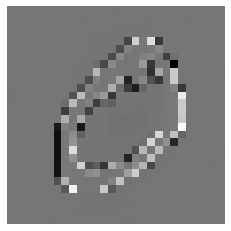

In [58]:
### Visualize 1 image from the data set

# import matplotlib
import matplotlib
import matplotlib.pyplot as plt 

#reshape array for one element of X
digit = X_train[1]  # set any index
digit = digit.reshape(28,28)
print("array's shape = image pixels : {}".format(digit.shape))

#display grey scal image: 
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

# change index in line 8 to change image sample

**3. Binary Classification model :** SGD Classifier (Model gives an answer to the question: Is this this digit or not?)





In [60]:
#import the SGD classifier from sklearn
from sklearn.linear_model import SGDClassifier

#train with the number 6
X_train6 = X_train == 6
y_train6 = y_train == 6

#apply classifier algorithm
sgd_classifier = SGDClassifier(max_iter = 20, tol = -np.infty)  # set max interation to 20 so that it doesn't take too long
sgd_classifier.fit(X_train,y_train6)


SGDClassifier(max_iter=20, tol=-inf)

[False]


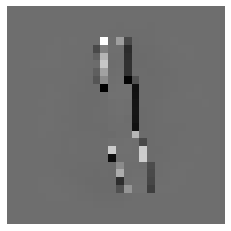

1
[ True]


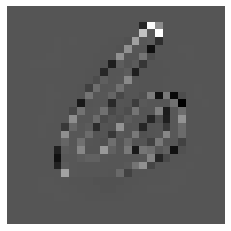

6


In [78]:
#inspect predictions

print(sgd_classifier.predict([X_train[1000]]))
plt.imshow(X_train[6].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y[3]) # predicts a 1 (index = 1000) as not beeing a 6!

print(sgd_classifier.predict([X_train[2345]]))
plt.imshow(X_train[2345].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y[32]) # predicts that image with index 2345 is a 6!

**4. Model Performance**

In [79]:
#cross validation - import cross_val_score
from sklearn.model_selection import cross_val_score

#shows accuracy on a scale from 0 to 1   =  #of correct predicitons / # of total predicitions 
cross_val_score(sgd_classifier, X_train, y_train6, cv = 6) #cv is the number of folds 


array([0.8662, 0.8722, 0.8723, 0.8758, 0.8733, 0.8683])